In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [17]:
def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))

random_spin_field(10,10)

array([[ 1, -1,  1,  1, -1,  1,  1, -1,  1, -1],
       [-1, -1, -1,  1,  1,  1, -1, -1, -1,  1],
       [-1,  1, -1,  1,  1, -1, -1, -1, -1,  1],
       [ 1,  1,  1, -1, -1, -1,  1,  1, -1,  1],
       [-1,  1,  1,  1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1, -1,  1,  1, -1, -1],
       [-1,  1, -1,  1,  1,  1,  1, -1, -1, -1],
       [-1, -1, -1,  1, -1, -1,  1,  1, -1,  1],
       [-1, -1, -1,  1, -1,  1, -1,  1, -1, -1],
       [ 1, -1,  1, -1,  1,  1,  1, -1,  1,  1]])

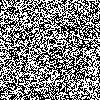

In [18]:
def display_spin_field(field):
    return Image.fromarray(np.uint8((field+1) * 0.5 * 255))

display_spin_field(random_spin_field(100,100))

In [19]:
def ising_step(field, beta = 0.4407):
    
    N, M = field.shape
    
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset,N,2):
                for m in range(m_offset, M, 2):
                    _ising_update(field,n,m,beta)
    return field

In [20]:
Magnetization = []

In [33]:
def _ising_update(field,n,m,beta):
    total = 0.
    
    N, M = field.shape
    
    for i in range(n-1,n+2):
        for j in range(m-1,m+2):
            if i == n and j == m:
                continue
            total += field[i%N,j%M]
            
            
    dE = 2*field[n,m]*total
    
    if dE <= 0:
        field[n,m] *= -1.
        
    elif np.exp(-dE * beta) > np.random.rand():
        field[n,m] *= -1.
    
    Magnetization.append(np.sum(field.ravel()))

In [34]:
display_spin_field(ising_step(random_spin_field(10, 10)))

In [38]:
from ipywidgets import interact

def display_ising_sequence(images):
    def _show(frame=(0, len(images) - 1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [39]:
images = [random_spin_field(200, 200)]
for i in range(50):
    images.append(ising_step(images[-1].copy()))
display_ising_sequence(images);

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yNSwgZGVzY3JpcHRpb249dSdmcmFtZScsIG1heD01MCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnTigKY=


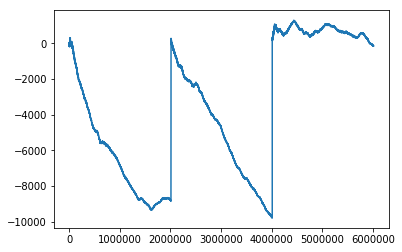

In [40]:
plt.plot(Magnetization)
#plt.xlim(0,10000)
#plt.ylim(-100,100)